In [9]:
#F:\MachineLearningProjects\insurance.csv  https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

### Data Collection

In [132]:
data = pd.read_csv('F:\MachineLearningProjects\BigMart_Sales.csv')

In [133]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### DAta Analysis


In [134]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [135]:
data.shape

(8523, 12)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 Handling Missing values

In [137]:
data.Item_Weight.mean()

12.857645184136183

In [138]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [139]:
data['Item_Weight'].fillna(data.Item_Weight.mean(),inplace=True)

In [140]:
# for next cat

In [141]:
mode_of_OutletSize = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [142]:
mode_of_OutletSize

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [143]:
missing_val = data['Outlet_Size'].isnull()

In [144]:
missing_val.value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

In [145]:
data.loc[missing_val,'Outlet_Size'] = data.loc[missing_val,'Outlet_Type'].apply(lambda x : mode_of_OutletSize[x])

In [146]:
data.loc[missing_val,'Outlet_Type']

3           Grocery Store
8       Supermarket Type1
9       Supermarket Type1
25      Supermarket Type1
28          Grocery Store
              ...        
8502    Supermarket Type1
8508    Supermarket Type1
8509        Grocery Store
8514    Supermarket Type1
8519    Supermarket Type1
Name: Outlet_Type, Length: 2410, dtype: object

In [147]:
data.Outlet_Size.head()

0    Medium
1    Medium
2    Medium
3     Small
4      High
Name: Outlet_Size, dtype: object

In [149]:
data.Outlet_Size.isnull().sum()

0

In [150]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [151]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,1.453596,2181.288914
std,4.226124,0.051598,62.275067,8.371760,0.683084,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,0.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,1.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,2.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,2.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,2.000000,13086.964800


In [152]:
### Ploting

In [153]:
sns.set()

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

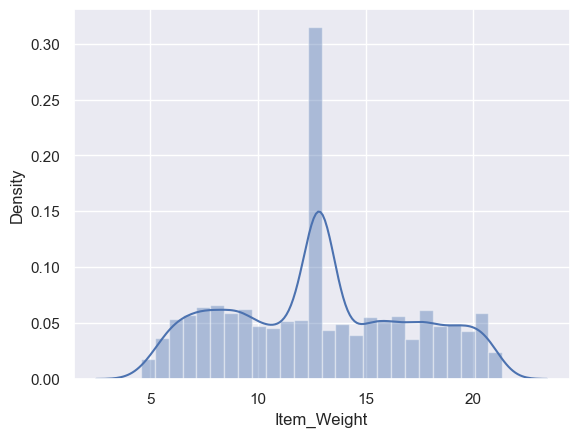

In [154]:
# item weight distribution
sns.distplot(data['Item_Weight'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

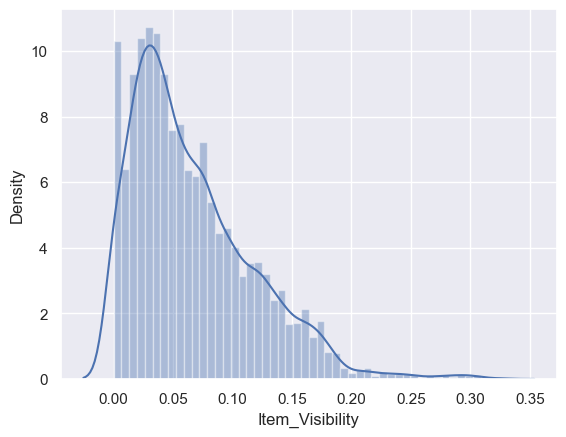

In [155]:
# Item Visibility
sns.distplot(data['Item_Visibility'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

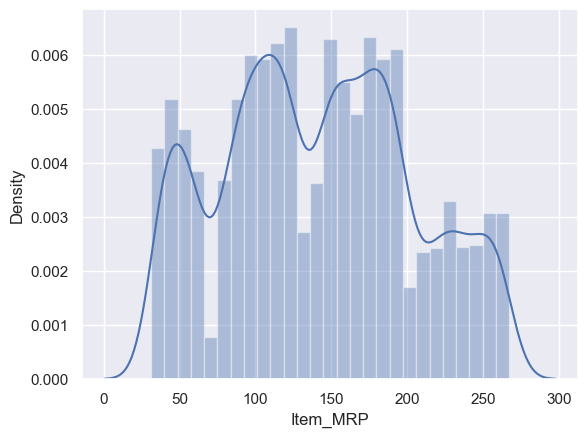

In [156]:
sns.distplot(data['Item_MRP'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

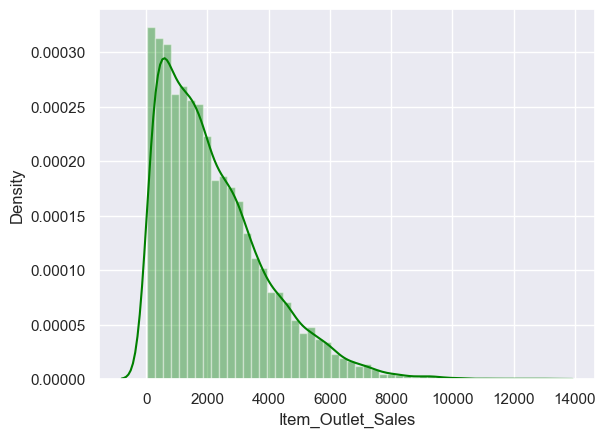

In [157]:
sns.distplot(data['Item_Outlet_Sales'],color='green')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

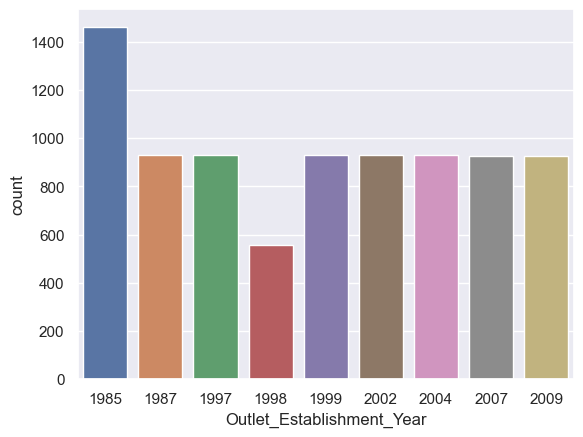

In [158]:
sns.countplot(x='Outlet_Establishment_Year',data=data)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

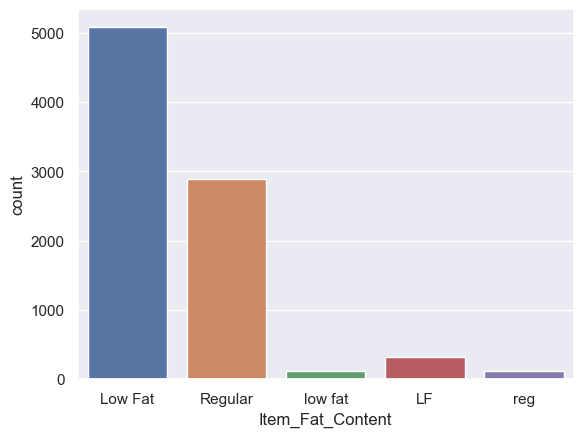

In [159]:
sns.countplot(x='Item_Fat_Content',data=data)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

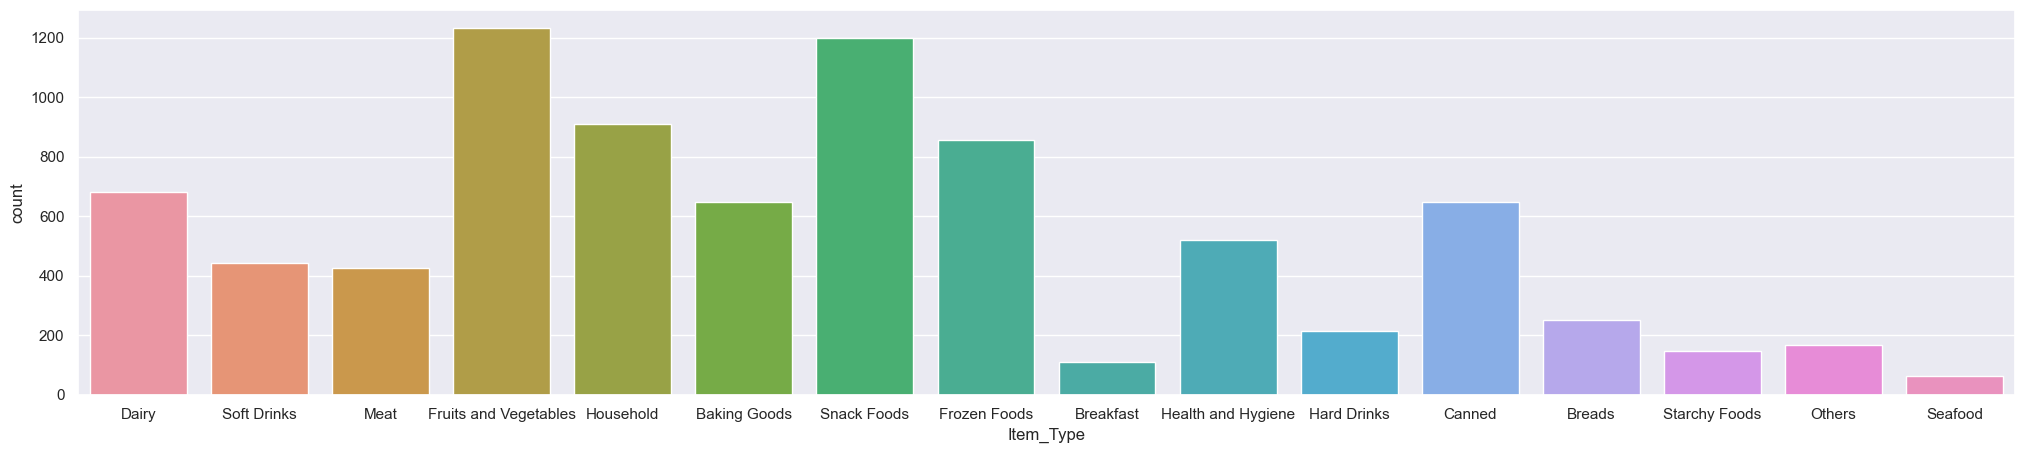

In [160]:
plt.figure(figsize=(25,5))
sns.countplot(x='Item_Type',data=data)

### Data Pre-Processing

In [161]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052


In [162]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [163]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [164]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [165]:
le = LabelEncoder()

In [166]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052


In [167]:
data['Item_Identifier'] = le.fit_transform(data['Item_Identifier'])

In [168]:
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

In [169]:
data['Item_Type'] = le.fit_transform(data['Item_Type'])

In [170]:
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])

In [171]:
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

In [172]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [173]:
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])

In [174]:
data['Outlet_Size'].value_counts()

2    4798
1    2793
0     932
Name: Outlet_Size, dtype: int64

In [175]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [176]:
X = data.drop('Item_Outlet_Sales',axis=1)

In [177]:
y = data.Item_Outlet_Sales

In [178]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [179]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Train and Test DAta

In [216]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [217]:
X_train.shape

(6818, 11)

In [218]:
X_test.shape

(1705, 11)

In [219]:
y_train.shape

(6818,)

In [220]:
y_test.shape

(1705,)

### XGBRegressor

In [222]:
model1 = XGBRegressor()

In [223]:
model1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [225]:
test_pred = model1.predict(X_test)

In [224]:
train_pred = model1.predict(X_train)

In [226]:
print('R2 Score of test Predction::',r2_score(y_test,test_pred))
print('Mean Absoulte Error of test Predction::',mean_absolute_error(y_test,test_pred))

R2 Score of test Predction:: 0.5233136709735687
Mean Absoulte Error of test Predction:: 847.7947437393422


In [227]:
print('R2 Score of train Predction::',r2_score(y_train,train_pred))
print('Mean Absoulte Error of test Predction::',mean_absolute_error(y_train,train_pred))

R2 Score of train Predction:: 0.8639680373364909
Mean Absoulte Error of test Predction:: 448.97749532567457
